<center><h1>Photo to Water Color ART <h1></center>

### Import libraries 

In [14]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt 

### Read the image

In [15]:
image = cv.imread('Images/messi4.jpeg')

### Resize the image [Interpolation is cubic for best results]

In [16]:
image_resized = cv.resize(image , None , fx=1 , fy = 1)
image_resized = cv.cvtColor(image_resized , cv.COLOR_BGR2RGB)

### Remove impurity from the images

In [17]:
image_cleared = cv.medianBlur(image_resized , 3)
image_cleared = cv.medianBlur(image_cleared , 3)
image_cleared = cv.medianBlur(image_cleared , 3)

image_cleared = cv.edgePreservingFilter(image_cleared , sigma_s = 5)

### Bilateral image filtering

In [18]:
image_filtered = cv.bilateralFilter(image_cleared , 2 , 10 , 5)

for i in range(2):
    image_filtered = cv.bilateralFilter(image_filtered , 4, 20 , 10)
    
for i in range(2):
    image_filtered = cv.bilateralFilter(image_filtered , 5, 30 , 10)    

### Sharpening the image using addWeighted()

In [12]:
gaussian_mask = cv.GaussianBlur(image_filtered , (7,7) , 2)

image_sharp = cv.addWeighted(image_filtered , 1.5 , gaussian_mask , -0.5 , 0)
image_sharp = cv.addWeighted(image_filtered , 1.4 , gaussian_mask , -0.2 , 10)

                            # SRC 1 , APLHA , SRC 2  , BETA , GAMMA


### Display Images

In [20]:
cv.imshow('Final Image' , image_sharp)
cv.imshow('Clear_Impurities' , image_cleared)
cv.imshow('Origin Image' , image_resized)
cv.waitKey(0)

-1

## Display With Matplotlib

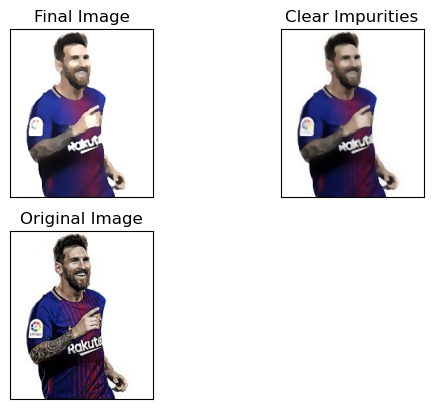

In [19]:
img = [image_sharp , image_cleared , image_resized]
title = ["Final Image" , 'Clear Impurities' , 'Original Image']


for i in range(3):
    plt.subplot(2, 2 , i+1) , plt.imshow(img[i] , 'gray')
    plt.title(title[i])
    plt.xticks([]) , plt.yticks([])

